**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_csv('adult.csv')
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [4]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
missing_val = (df == '?').sum()

# Replace '?' with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
workclass         1836
occupation        1843
native.country     583
dtype: int64


In [7]:
df.describe().T

count       mean        std       min        25%  \
age            32561.000     38.582     13.640    17.000     28.000   
fnlwgt         32561.000 189778.367 105549.978 12285.000 117827.000   
education.num  32561.000     10.081      2.573     1.000      9.000   
capital.gain   32561.000   1077.649   7385.292     0.000      0.000   
capital.loss   32561.000     87.304    402.960     0.000      0.000   
hours.per.week 32561.000     40.437     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 237051.000 1484705.000  
education.num      10.000     12.000      16.000  
capital.gain        0.000      0.000   99999.000  
capital.loss        0.000      0.000    4356.000  
hours.per.week     40.000     45.000      99.000

In [8]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

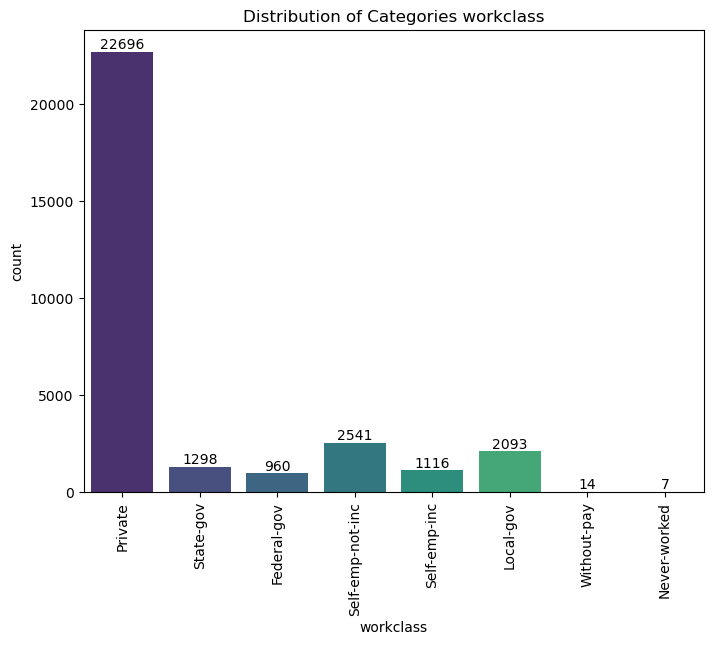

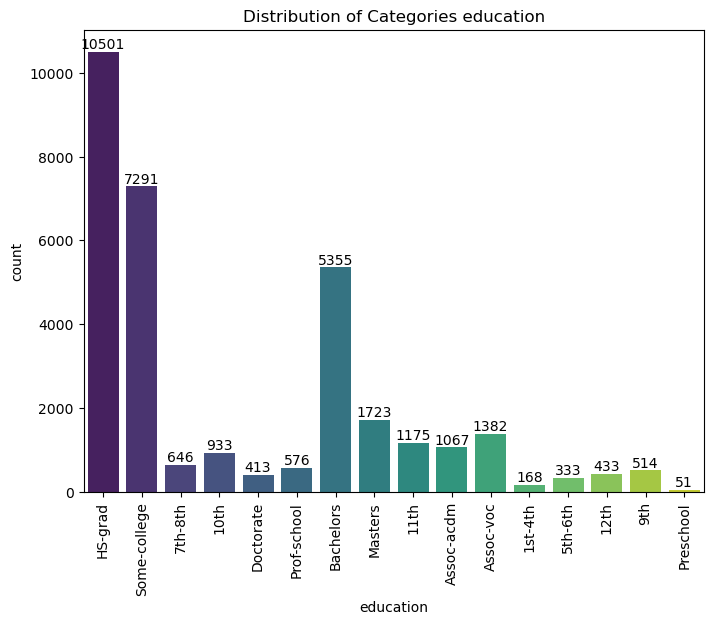

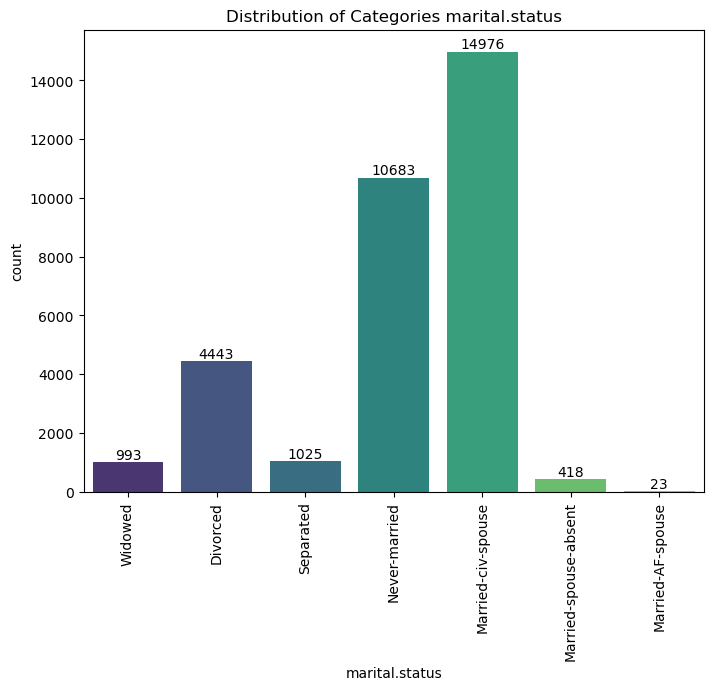

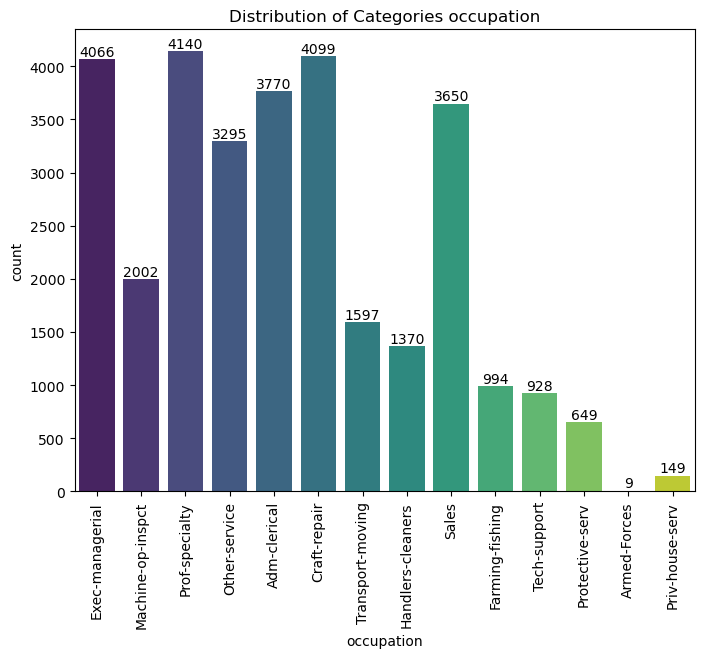

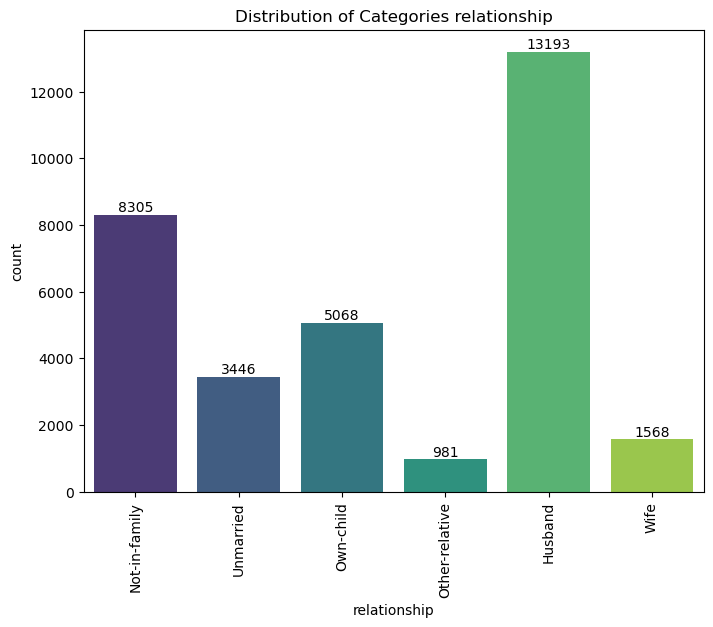

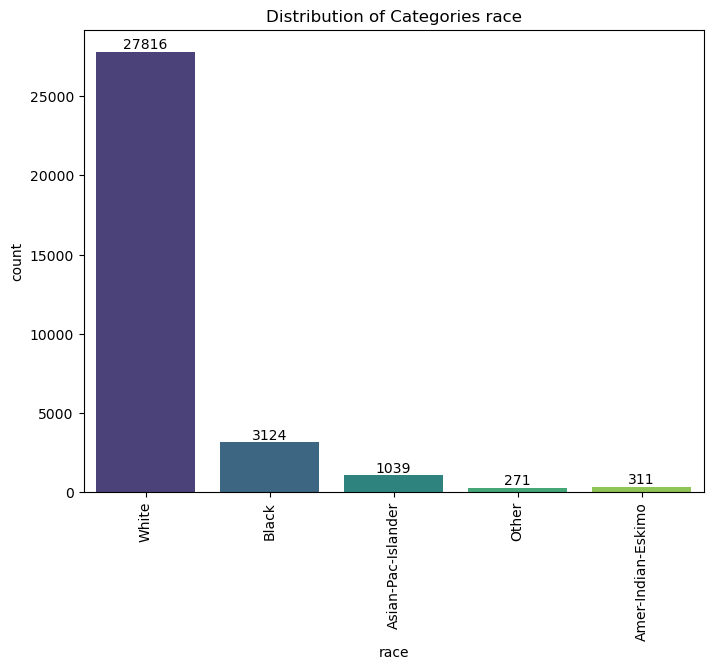

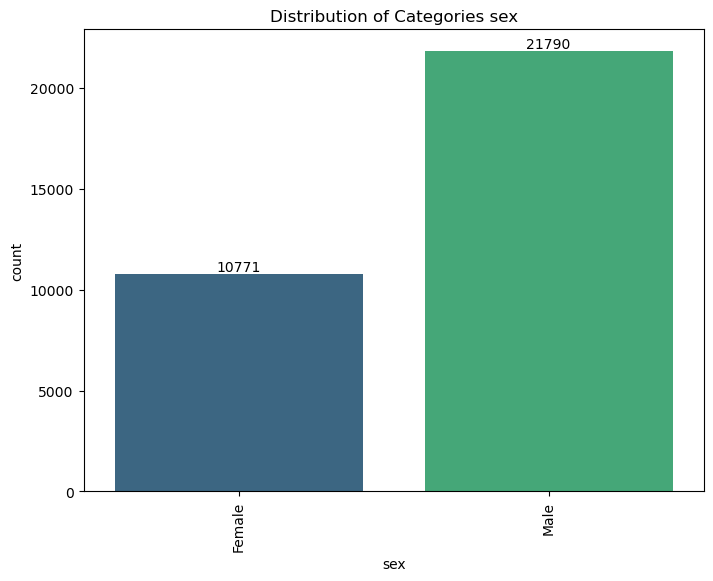

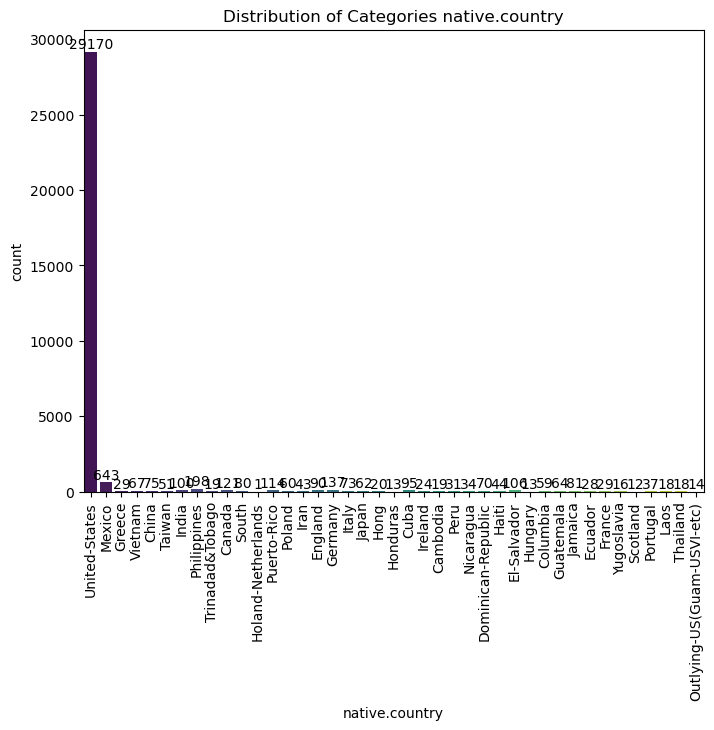

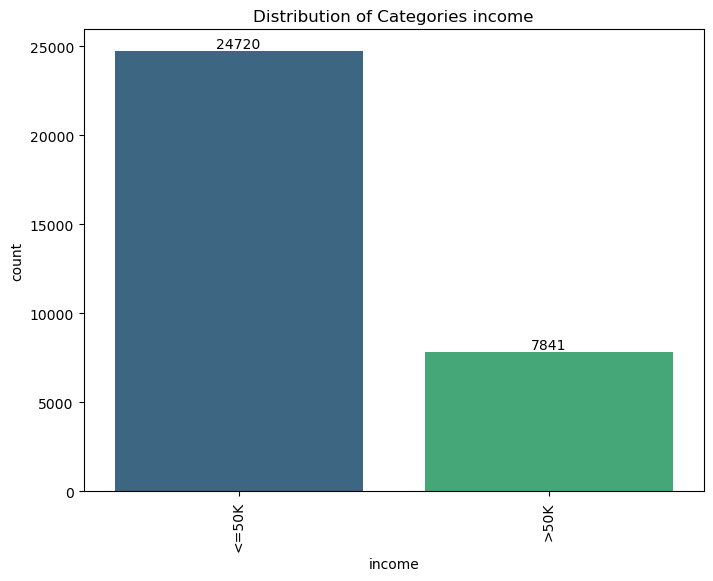

In [10]:
# Kategorik feature ların dağılımını göstermek için;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [11]:
species_count = df['income'].value_counts().reset_index()
species_count.columns = ['income', 'count']

fig = px.bar(species_count, x='income', y='count', text='count', color='income')

fig.update_traces(texttemplate='%{text}', textposition='outside')

In [12]:
species_sex_count = df.groupby(['income', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='income', y='count', color='income', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

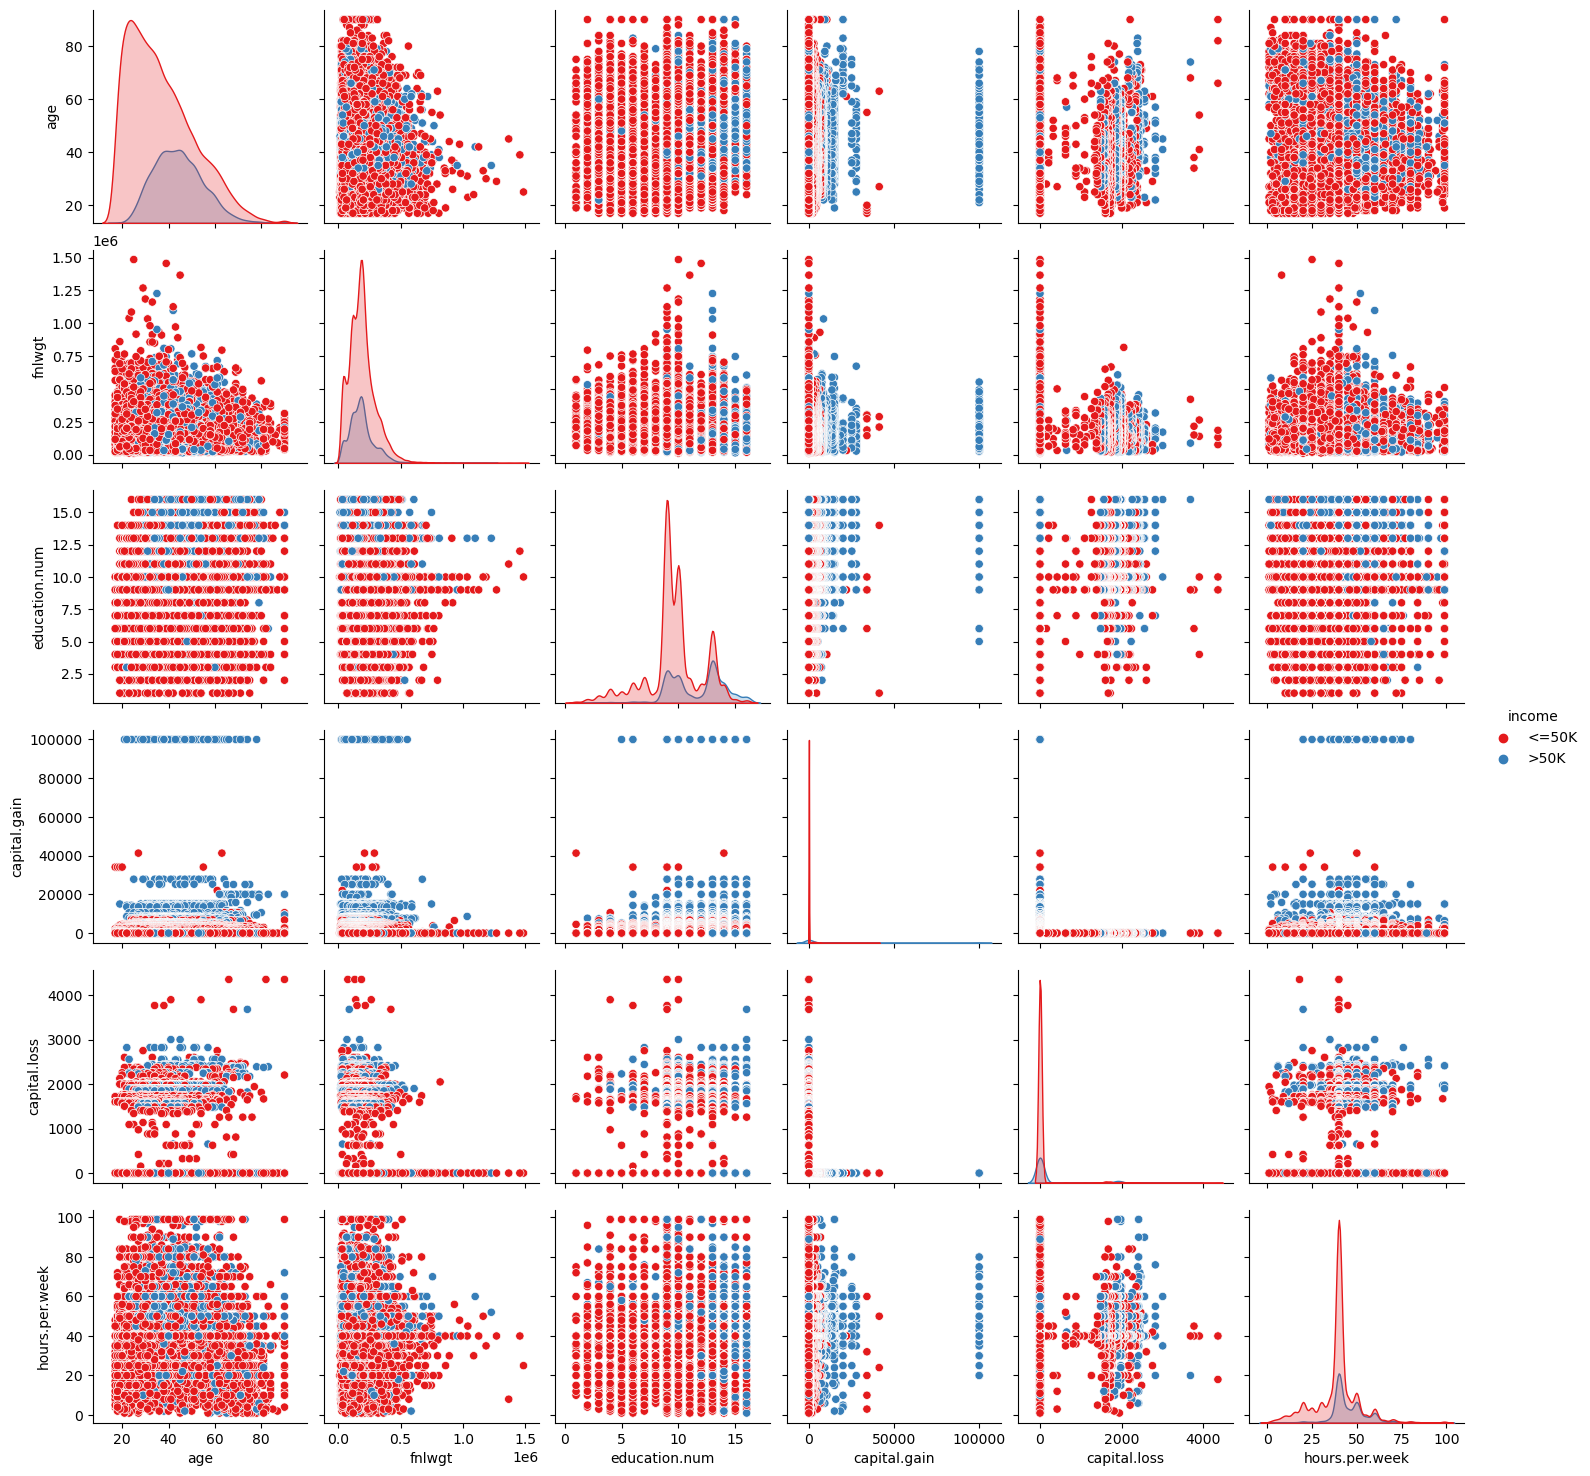

In [13]:
sns.pairplot(df, hue="income", palette="Set1");

In [14]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

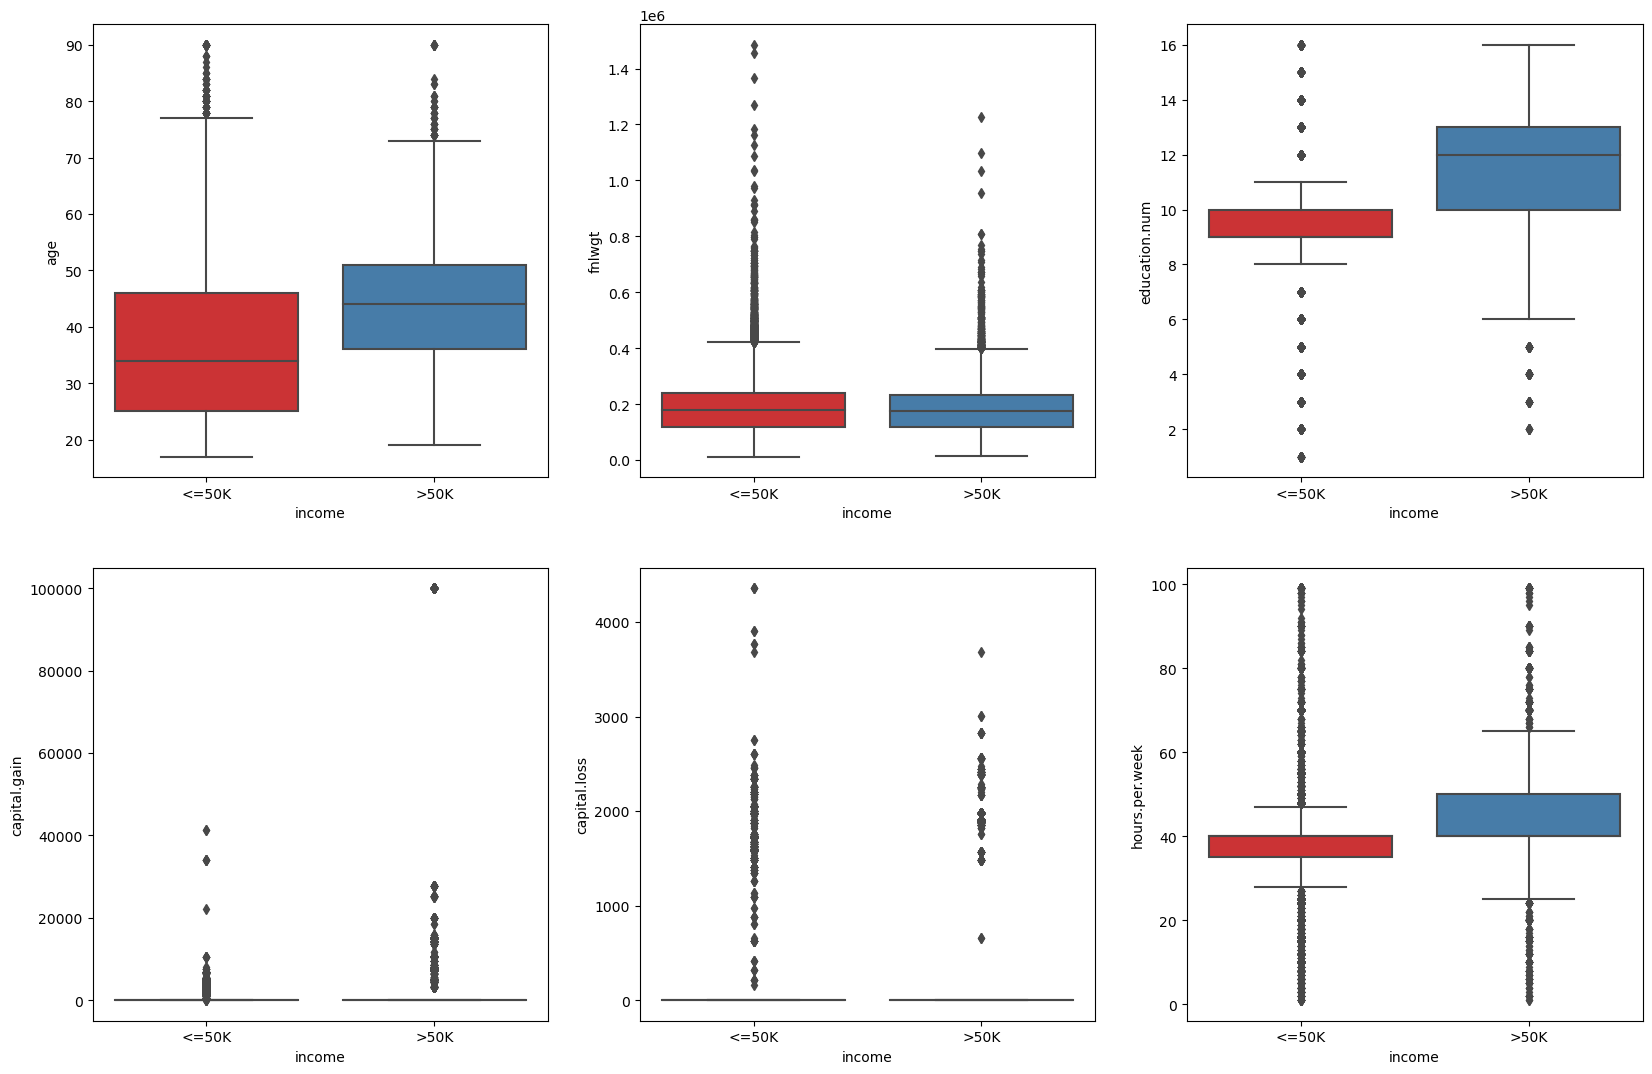

In [15]:
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, palette='Set1')
plt.show()

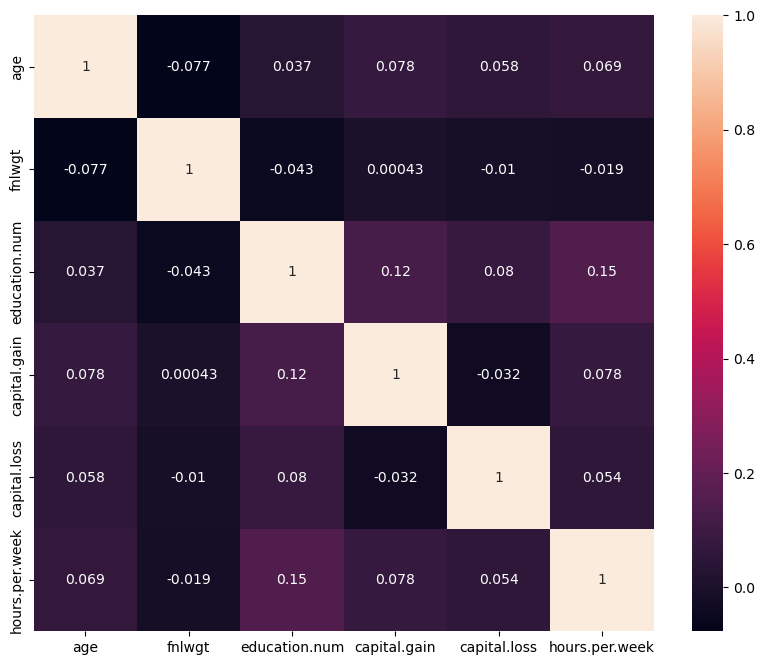

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot = True);

# Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
X = df.drop('income', axis=1)
y = df['income']

In [19]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [20]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Classification

# Support Vector Classifier